# Hernquist fit of DM halos

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Estimate-scale-lengths" data-toc-modified-id="Estimate-scale-lengths-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Estimate scale lengths</a></span></li></ul></div>

In [1]:
# scientific package imports
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
from matplotlib import rcParams

import astropy.units as u
from astropy.constants import G

# import my own classes
from galaxy.galaxy import Galaxy
from galaxy.galaxies import Galaxies
from galaxy.massprofile import MassProfile
from galaxy.timecourse import TimeCourse
from galaxy.centerofmass import CenterOfMass
from galaxy.plots import Plots

In [2]:
tc = TimeCourse(usesql=True)

## Estimate scale lengths

In [3]:
def get_a(galname, snap, r_outer=100):
    gal = Galaxy(galname, snap, usesql=True)
    t = gal.time.value / 1000
    com_p, _ = tc.get_one_com(galname, snap)
    mp = MassProfile(gal, com_p)
    fitted_a, perr = mp.fit_hernquist_a(r_outer=r_outer, get_details=True)
    return t, fitted_a.value, perr.value

In [4]:
with open('./hqa.txt', 'w') as f:
    f.write(f"# {'gal':>5s}{'snap':>8s}{'t':>8s}{'a':>8s}{'err':>8s}\n")
for galname in ('MW','M31','M33'):
    print(galname)
    for snap in np.arange(0, 802):
        try:
            t, a, err = get_a(galname, snap)
            with open('./hqa.txt', 'a') as f:
                f.write(f"{galname:>7s}{snap:8d}{t:8.3f}{a:8.1f}{err:8.1f}\n")   
        except ValueError:
            print(galname, snap)

MW


/home/colin/lcode/400b/400B_Leach/source/galaxy/massprofile.py:181: RuntimeWarning: divide by zero encountered in log
  halo = np.log(self.mass_enclosed(radii_outer, 1).value)


MW 438
MW 439
MW 444
M31
M31 446
M33
M33 733


In [21]:
hqa = np.genfromtxt('hqa.csv', delimiter=',', names=True, skip_header=0,
                    dtype=[('gal', 'U3'), ('snap', '<i8'), ('a', '<f8'), ('err', '<f8')])

In [22]:
hqa

array([('MW',   0,  61.6, 0.5), ('MW',   1,  61. , 0.1),
       ('MW',   2,  60.1, 0.4), ..., ('M33', 799, 114.6, 9.6),
       ('M33', 800, 114.5, 9.8), ('M33', 801, 112.7, 9.8)],
      dtype=[('gal', '<U3'), ('snap', '<i8'), ('a', '<f8'), ('err', '<f8')])

In [24]:
MW = hqa[hqa['gal'] == 'MW']
M31 = hqa[hqa['gal'] == 'M31']
M33 = hqa[hqa['gal'] == 'M33']


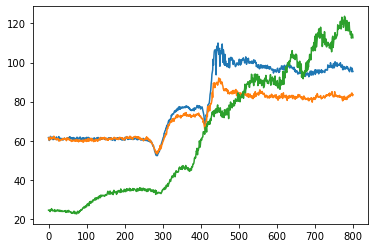

In [29]:
plt.plot(MW['snap'], MW['a'])
plt.plot(M31['snap'], M31['a'])
plt.plot(M33['snap'], M33['a'])
